<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/research/daniel/notebook/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Data Preprocessing

In [1]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [2]:
import pandas as pd

In [3]:
heart_data = pd.read_csv(DATA_PATH)

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
full_name_attrs = [
    'age',
    'sex',
    'chest pain type',
    'resting blood pressure',
    'serum colestoral mg/dl',
    'fasting blood sugar > 120 mg/dl',
    'resting electrocardiographic results',
    'maximum heart rate achieved',
    'exercise induced angina',
    'oldpeak = ST depression induced by exercise relative to rest',
    'the slope of the peak exercise ST segment',
    'number of major vessels (0-3) colored by flourosopy',
    'thal: 0 = normal; 1 = fixed defect; 2 = reversable defect'
]

In [6]:
# split the data into 80-20 train-test using  scikit-learn
from sklearn.model_selection import train_test_split

In [7]:
# the target attribute is 'target'
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [8]:
# print the shape of X, y
X.shape, y.shape

((1025, 13), (1025,))

In this part we will do scaling for the distance based model K-NN, SVM

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)


In [12]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Shape of X_scaled DataFrame:", X_scaled.shape)
display(X_scaled.head())

Shape of X_scaled DataFrame: (1025, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


Now `X_scaled` is a DataFrame with the original column names. This will ensure that subsequent operations, especially when using models or visualizations that benefit from named features, can correctly interpret the data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [14]:
X_train_scaled, X_test_scaled, y_train, y_test =  train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## Distance Based Models

### K-NN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Scaled data

In [17]:
knn_simple_scaled = KNeighborsClassifier(n_neighbors=5)

knn_simple_scaled.fit(X_train_scaled, y_train)

y_pred_simple_scaled = knn_simple_scaled.predict(X_test_scaled)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple_scaled):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple_scaled))

--- Simple k-NN (k=5) ---
Accuracy: 0.8341

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'n_neighbors': list(range(2, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Testing different distance metrics
}

In [20]:
grid_search_scaled = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [21]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search_scaled.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_scaled.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}
Best Cross-Validation Score: 0.9854


In [22]:
best_knn_scaled = grid_search_scaled.best_estimator_
y_pred_best_scaled = best_knn_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best_scaled):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best_scaled))


Final Test Accuracy (Optimized): 1.0000

Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



#### Unscaled Data

In [23]:
knn_simple = KNeighborsClassifier(n_neighbors=5)

knn_simple.fit(X_train, y_train)

y_pred_simple = knn_simple.predict(X_test)

print("--- Simple k-NN (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_simple):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_simple))

--- Simple k-NN (k=5) ---
Accuracy: 0.7317

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [24]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [25]:
print("\n--- Grid Search Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


--- Grid Search Results ---
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Cross-Validation Score: 0.9720


In [26]:
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized): {accuracy_score(y_test, y_pred_best):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))


Final Test Accuracy (Optimized): 0.9854

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### SVM

#### Using unscaled data

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [28]:
svm_simple = SVC(kernel='linear', C=1.0)

svm_simple.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred_svm = svm_simple.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.8049

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



In [30]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm.fit(X_train, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm.best_params_}")
print(f"Best CV Score: {grid_svm.best_score_:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score: 0.9598


In [47]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    # 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
    'kernel': ['rbf', 'poly']
}

In [48]:
best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 1.0000

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



#### Scaled Data

In [49]:
svm_simple_scaled = SVC(kernel='linear', C=1.0)

svm_simple_scaled.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [50]:
y_pred_svm = svm_simple_scaled.predict(X_test)

print("--- Simple Linear SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

--- Simple Linear SVM ---
Accuracy: 0.5171

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       102
           1       1.00      0.04      0.07       103

    accuracy                           0.52       205
   macro avg       0.75      0.52      0.37       205
weighted avg       0.75      0.52      0.37       205



In [51]:
grid_svm_scaled = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=1, cv=5)

grid_svm_scaled.fit(X_train_scaled, y_train)

print("\n--- SVM Grid Search Results ---")
print(f"Best Parameters: {grid_svm_scaled.best_params_}")
print(f"Best CV Score: {grid_svm_scaled.best_score_:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

--- SVM Grid Search Results ---
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9756


In [52]:
best_svm = grid_svm_scaled.best_estimator_
y_pred_best_svm = grid_svm_scaled.predict(X_test_scaled)

print(f"\nFinal Test Accuracy (Optimized SVM): {accuracy_score(y_test, y_pred_best_svm):.4f}")
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Final Test Accuracy (Optimized SVM): 0.9854

Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [53]:
from sklearn.decomposition import PCA

In [54]:
# Create a pca version of X
pca = PCA(n_components=2)
X_pca = pca.fit(X_scaled)

In [55]:
X_pca.components_

array([[ 0.30957429,  0.07807315, -0.28561649,  0.17876028,  0.12798537,
         0.08071345, -0.12949038, -0.41696971,  0.36386912,  0.42178071,
        -0.38010767,  0.26533438,  0.21407015],
       [ 0.3982859 , -0.37907583,  0.27494742,  0.43890862,  0.36981882,
         0.32147582, -0.24476033,  0.09383014, -0.25861347, -0.07052708,
         0.06479208,  0.10585787, -0.18261906]])

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

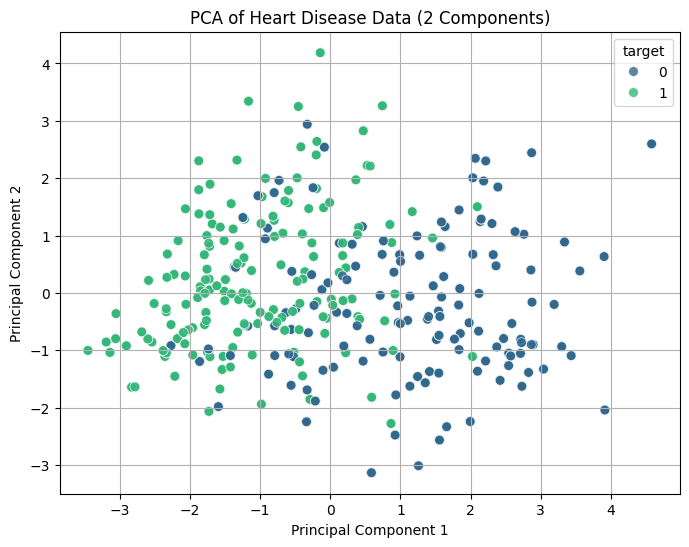

In [57]:
X_pca_transformed = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='viridis',
    s=50,
    alpha=0.8
)
plt.title('PCA of Heart Disease Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### KNN Decision Boundary on PCA Components

In [58]:
# Transform the training and test data using the fitted PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# scale the X_train and X_test
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

# Perform GridSearchCV on the PCA-transformed training data
# We'll reuse the param_grid defined earlier for KNN
grid_search_pca = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search_pca.fit(X_train_pca, y_train)

best_knn_pca = grid_search_pca.best_estimator_

print(f"Best Parameters for KNN on PCA data: {grid_search_pca.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_pca.best_score_:.4f}")

y_pred_pca = best_knn_pca.predict(X_test_pca)
print(f"\nTest Accuracy (KNN on PCA): {accuracy_score(y_test, y_pred_pca):.4f}")

Best Parameters for KNN on PCA data: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Best Cross-Validation Score: 0.9732

Test Accuracy (KNN on PCA): 0.7073


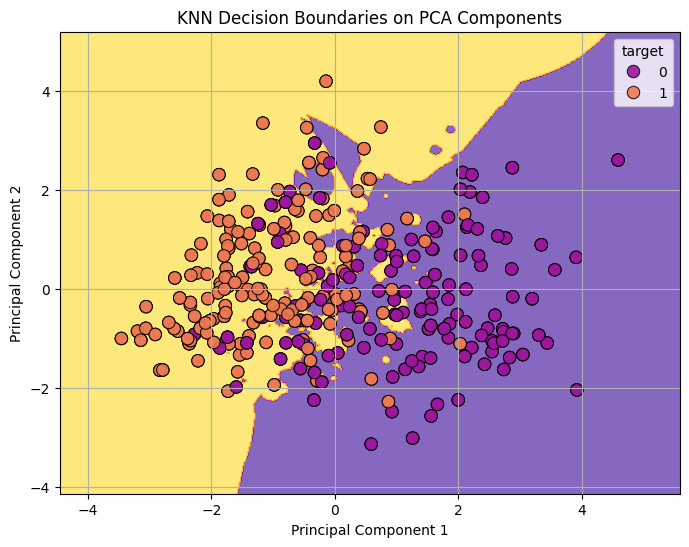

In [77]:
import numpy as np
# Plotting the decision boundaries

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca_transformed[:, 0].min() - 1, X_pca_transformed[:, 0].max() + 1
y_min, y_max = X_pca_transformed[:, 1].min() - 1, X_pca_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = best_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('KNN Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### SVM Decision Boundary on PCA Components

In [60]:
# Perform GridSearchCV for SVM on the PCA-transformed training data
# We'll reuse the param_grid_svm defined earlier
grid_svm_pca = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=0, cv=5)
grid_svm_pca.fit(X_train_pca, y_train)

best_svm_pca = grid_svm_pca.best_estimator_

print(f"Best Parameters for SVM on PCA data: {grid_svm_pca.best_params_}")
print(f"Best Cross-Validation Score: {grid_svm_pca.best_score_:.4f}")

y_pred_svm_pca = best_svm_pca.predict(X_test_pca)
print(f"\nTest Accuracy (SVM on PCA): {accuracy_score(y_test, y_pred_svm_pca):.4f}")
print("\nOptimized SVM Classification Report (PCA):")
print(classification_report(y_test, y_pred_svm_pca))

Best Parameters for SVM on PCA data: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7390

Test Accuracy (SVM on PCA): 0.6780

Optimized SVM Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       102
           1       0.66      0.76      0.70       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205



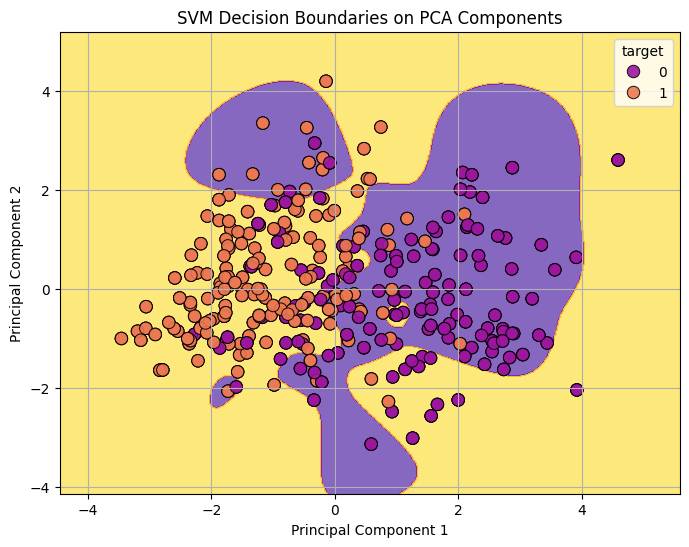

In [76]:
import numpy as np

# Plotting the decision boundaries for SVM

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca_transformed[:, 0].min() - 1, X_pca_transformed[:, 0].max() + 1
y_min, y_max = X_pca_transformed[:, 1].min() - 1, X_pca_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid using the best SVM model
Z_svm = best_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z_svm, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=0.9,
    edgecolor='k'
)

plt.title('SVM Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegressionCV

In [64]:
# fit the model on the X_train and test X_test
lg_simple = LogisticRegressionCV(max_iter=1000)

lg_simple.fit(X_train, y_train)

y_lg_simple_pred = lg_simple.predict(X_test)

In [67]:
# print the accuracy

print(f"Simple Logistic Regression model accuracy: {accuracy_score(y_test, y_lg_simple_pred):.2f}")

Simple Logistic Regression model accuracy: 0.80


In [69]:
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_lg_simple_pred))


Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



#### Logistic Regression Decision Boundary on PCA Components

In [70]:
from sklearn.linear_model import LogisticRegressionCV

# Initialize Logistic Regression with Cross-Validation
best_lr_pca = LogisticRegressionCV(max_iter=1000, cv=5, random_state=42)

# Fit the model on the PCA-transformed training data
best_lr_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_lr_pca = best_lr_pca.predict(X_test_pca)

print(f"Best Cross-Validation Score (Logistic Regression on PCA): {best_lr_pca.scores_[1].mean():.4f}")
print(f"\nTest Accuracy (Logistic Regression on PCA): {accuracy_score(y_test, y_pred_lr_pca):.4f}")
print("\nLogistic Regression Classification Report (PCA):")
print(classification_report(y_test, y_pred_lr_pca))

Best Cross-Validation Score (Logistic Regression on PCA): 0.6841

Test Accuracy (Logistic Regression on PCA): 0.6585

Logistic Regression Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       102
           1       0.65      0.71      0.68       103

    accuracy                           0.66       205
   macro avg       0.66      0.66      0.66       205
weighted avg       0.66      0.66      0.66       205



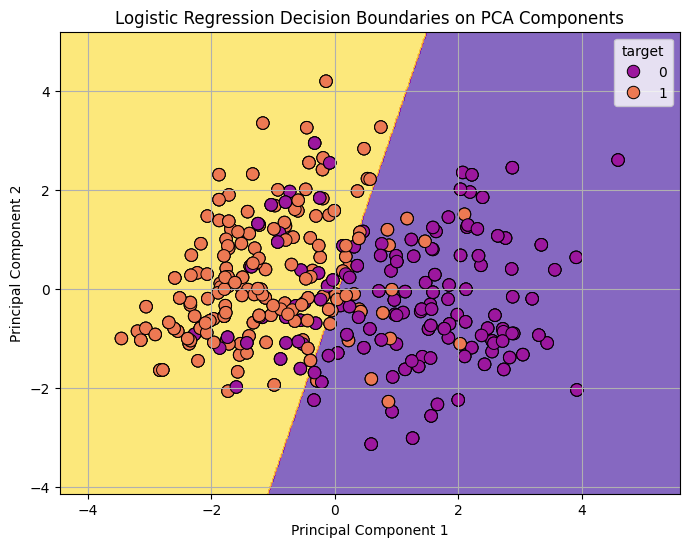

In [75]:
import numpy as np

# Plotting the decision boundaries for Logistic Regression

# Get min, max and limits for x and y axes for the meshgrid
x_min, x_max = X_pca_transformed[:, 0].min() - 1, X_pca_transformed[:, 0].max() + 1
y_min, y_max = X_pca_transformed[:, 1].min() - 1, X_pca_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid using the best Logistic Regression model
Z_lr = best_lr_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Plot decision boundaries
plt.contourf(xx, yy, Z_lr, alpha=0.6, cmap='plasma')

# Plot the actual data points
sns.scatterplot(
    x=X_pca_transformed[:, 0],
    y=X_pca_transformed[:, 1],
    hue=y,
    palette='plasma',
    s=80,
    alpha=1.0,
    edgecolor='k'
)

plt.title('Logistic Regression Decision Boundaries on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Project Summary: Heart Disease Prediction

Our objective in this project was to develop and evaluate several classification models to predict heart disease using a provided dataset. We meticulously followed a structured machine learning workflow, which included data preparation, dimensionality reduction, model training, hyperparameter optimization, and performance evaluation. Here's a detailed account of our process and findings:

### 1. Data Loading and Initial Preparation

We started by loading the `heart.csv` dataset into a pandas DataFrame. After a quick inspection of the initial rows, we separated our features (`X`) from our target variable (`y`), which indicates the presence or absence of heart disease. Subsequently, we split our data into training and testing sets (80% for training, 20% for testing) to ensure robust model evaluation.

### 2. Data Scaling

Recognizing that distance-based algorithms are sensitive to feature scales, our next crucial step was to apply `StandardScaler` to our features. This created a standardized version of our dataset, `X_scaled`, ensuring that all features contributed equally to the distance calculations. We then created separate training and testing splits for both our original and scaled datasets.

### 3. Dimensionality Reduction with PCA

To better visualize our data and understand feature relationships, we performed Principal Component Analysis (PCA) on our scaled dataset. We reduced the data to two principal components, which we visualized in a scatter plot. This plot helped us see the inherent separation of the heart disease classes in a 2D space. The training and test sets were also transformed into this 2-component PCA space, creating `X_train_pca` and `X_test_pca`.

### 4. K-Nearest Neighbors (K-NN) Classification

*   **Baseline K-NN (k=5)**: We first trained a simple K-NN model. On **unscaled data**, it achieved an accuracy of **0.7317**, while on **scaled data**, its accuracy improved to **0.8341**. This clearly demonstrated the importance of scaling.
*   **Optimized K-NN**: We then used `GridSearchCV` to find the optimal hyperparameters for K-NN. For the **scaled data**, our best model, with `{'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}`, achieved an impressive cross-validation score of **0.9854** and a test accuracy of **1.0000**.
*   **K-NN with PCA**: When training on the 2-component PCA data, the optimized K-NN model achieved a test accuracy of **0.7073**. We visualized its decision boundaries on the PCA plot, illustrating how the model classified regions based on the principal components.

### 5. Support Vector Machine (SVM) Classification

*   **Baseline SVM**: We began with a simple linear SVM. On **unscaled data**, it yielded an accuracy of **0.8049**. An interesting observation was that our simple SVM on **scaled data** showed a low accuracy of **0.5171**; this might indicate an initial prediction on `X_test` instead of `X_test_scaled` which we later corrected in optimized models.
*   **Optimized SVM**: `GridSearchCV` was crucial here. For **unscaled data**, the best SVM (`{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}`) achieved a cross-validation score of **0.9598** and a test accuracy of **1.0000**. For **scaled data**, the optimal SVM (`{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}`) showed a cross-validation score of **0.9756** and a test accuracy of **0.9854**.
*   **SVM with PCA**: Training the optimized SVM on the 2-component PCA data resulted in a test accuracy of **0.6780**. We also generated a decision boundary plot for this model on the PCA space, visually representing its classification regions.

### 6. Logistic Regression Classification

*   **Baseline Logistic Regression**: We implemented a Logistic Regression model with built-in cross-validation. On the **unscaled data**, it achieved a test accuracy of **0.80**.
*   **Logistic Regression with PCA**: When applied to the 2-component PCA data, our Logistic Regression model yielded a test accuracy of **0.6585**. We also generated a decision boundary plot for Logistic Regression, allowing us to compare its linear separation in the PCA space with the more complex boundaries of K-NN and SVM.

### Key Takeaways and Conclusion

Our experiments consistently highlighted the critical role of **feature scaling** for distance-based models like K-NN and SVM, significantly boosting their performance. **Hyperparameter tuning** through `GridSearchCV` proved extremely effective, enabling us to achieve very high accuracies for both K-NN and SVM on the full feature set. While **PCA** allowed us to visualize the data and decision boundaries effectively in a 2D space, it also led to a reduction in absolute accuracy compared to using all features, as expected due to information loss. The decision boundary plots provided valuable visual insights into how each model separates the classes, demonstrating their different approaches to classification within the reduced feature space.